In [12]:
#boilerplate
import numpy as np
import scipy.stats as stat
import scipy.fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
import scipy.optimize as opt
import imageio as io
import project2_phase2 as p2p2

In [88]:
def diffusion(M,T,B=np.array([])):
    """
    This function takes a 2D matrix M and performs anisotropic diffusion T times along the isophotes.
    
    Params
    ------
    M : ndarray [J,L]
      Matrix to perform diffusion on
    x : int
      The times to iterate over matrix M
    B : ndarray [2,N]
        Mask for the areas to perform diffusion on where B[0] are the x coordinates and B[1] are the y coordinates for the matrix 
    
    Returns
    -------
    O : ndarray
      A 2D array of the size and shape of M after T steps of diffusion have been performed
    
    """
    fx=np.zeros_like(M)
    fy=np.zeros_like(M)
    fxy=np.zeros_like(M)
    fyy=np.zeros_like(M)
    fxx=np.zeros_like(M)
    if(B.any()==False):
        for x in range(T):
            fx[1:-1]=(M[2:]-M[:-2])/2
            fy[:,1:-1]=(M[:,2:]-M[:,:-2])/2
            fxx[1:-1]=M[2:]+M[:-2]-2*M[1:-1]
            fyy[:,1:-1]=M[:,2:]+M[:,:-2]-2*M[:,1:-1]
            fxy[1:-1,1:-1]=(M[2:,2:]-M[:-2,2:]-M[2:,:-2]+M[:-2,:-2])/4
            n2=fx*fx+fy*fy+1e-10 #stops divide by zero error
            M=M+(fyy*fx*fx+fxx*fy*fy-2*fx*fy*fxy)/(n2*5) #The five here was used to stop shocks but it doesn't have to be exactly that
    else:
        i=B[0]
        j=B[1]
        for x in range(T):
            fx[i,j]=(M[i+1,j]-M[i,j-1])/2
            fy[i,j]=(M[i,j+1]-M[i,j-1])/2
            fxx[i,j]=M[i+1,j]+M[i,j-1]-2*M[i,j]
            fyy[i,j]=M[i,j+1]+M[i,j-1]-2*M[i,j]
            fxy[i,j]=(M[i+1,j+1]-M[i-1,j+1]-M[i+1,j-1]+M[i-1,j-1])/4
            n2=fx*fx+fy*fy+1e-10 #stops divide by zero error
            M=M+(fyy*fx*fx+fxx*fy*fy-2*fx*fy*fxy)/(n2*5) #The five here was used to stop shocks but it doesn't have to be exactly that
    O=M
    return O

In [44]:
def Bert(M):
    fx=np.zeros_like(M)
    fy=np.zeros_like(M)
    fxf=np.zeros_like(M)
    fyf=np.zeros_like(M)
    fxb=np.zeros_like(M)
    fyb=np.zeros_like(M)
    fyy=np.zeros_like(M)
    fxx=np.zeros_like(M)
    fx[1:-1]=(M[2:]-M[:-2])/2
    fy[:,1:-1]=(M[:,2:]-M[:,:-2])/2
    fxx[1:-1]=M[2:]+M[:-2]-2*M[1:-1]
    fyy[:,1:-1]=M[:,2:]+M[:,:-2]-2*M[:,1:-1]
    lap=fxx+fyy
    GradN=np.sqrt(fx*fx+fy*fy+1e-6)
    Nfx=fx/GradN
    Nfy=fy/GradN
    fxb[1:-1]=M[1:-1]-M[:-2]
    fxf[1:-1]=M[1:-1]-M[2:]
    fyb[:,1:-1]=M[:,1:-1]-M[:,:-2]
    fyf[:,1:-1]=M[:,1:-1]-M[:,2:]
    fxbm=min(fxb,0) 
    fxbM=max(fxb,0)
    fxfm=min(fxf,0) 
    fxfM=max(fxf,0)
    fybm=min(fyb,0) 
    fybM=max(fyb,0)
    fyfm=min(fyf,0) 
    fyfM=max(fyf,0)
    c=0.5*( (lap[2:-2]-lap[:])*(-Nfy)+(lap[:,2:-2]-lap[:,:])*(Nfx))
    if (c>0):
        ModGI=np.sqrt( Ixatm*Ixatm + IxadM*IxadM +Iyatm*Iyatm + IyadM*IyadM )
    else:
        ModGI=np.sqrt( IxatM*IxatM + Ixadm*Ixadm + IyatM*IyatM + Iyadm*Iyadm )
    c*=GradN
    sign=np.sign(c)
    res=sign*sqrt(sqrt(sign*c))
    return res

In [43]:
Bert(clown_grey)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
clown = io.imread('clown.jpg')
clown_grey = p2p2.make_greyscale(clown)

In [16]:
pixval=np.random.rand(100,100) #Noisy array for chisquared and Diffusion
test=np.ones([100,100])*5
pixval=np.diag(test[1])+pixval+np.diag(test[1])[::-1] #adds diagonal lines to test diffusion equation

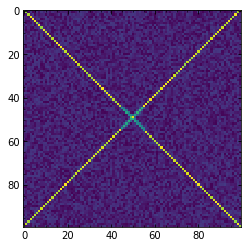

In [111]:
B=np.zeros([2,121],dtype=int)
B[0]=np.repeat(np.arange(45,56),11)
b=np.arange(45,56)
B[1]=np.concatenate((b,b,b,b,b,b,b,b,b,b,b))
diffuse=diffusion(pixval,1,B)
fig = plt.figure()
ax = fig.add_subplot(111)
rimg=ax.imshow(diffuse)

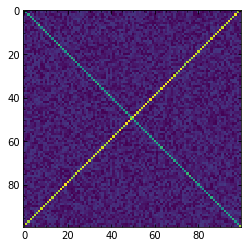

In [112]:
B=np.zeros([2,98],dtype=int)
B[0]=np.arange(1,99)
B[1]=np.arange(1,99)
diffuse=diffusion(pixval,1,B)
fig = plt.figure()
ax = fig.add_subplot(111)
rimg=ax.imshow(diffuse,)

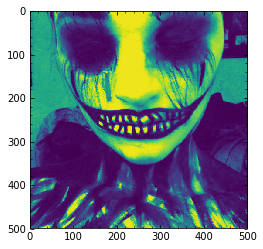

In [113]:
s=498
B=np.zeros([2,4*s],dtype=int)
b1=np.arange(0,s)
b2=np.ones(s)
B[1]=np.concatenate((b1,b1,b2*250,b2*251))
B[0]=np.concatenate((b2-1,b2*s,b1,b1))

diffuse=diffusion(clown_grey,100,B)
fig = plt.figure()
ax = fig.add_subplot(111)
rimg=ax.imshow(diffuse)

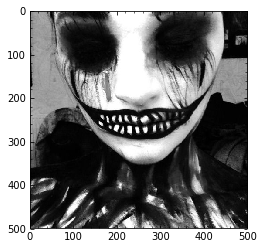

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
rimg=ax.imshow(clown_grey,'gray')

In [93]:
def sol(rho,delta):
    J,L=rho.shape
    a,b=np.mgrid[0:J,0:L]
    denom=2*(np.cos(2*np.pi*a/J)+np.cos(2*np.pi*b/L)-2)
    u=rho
    u[1:-1,1:-1]=rho[1:-1,1:-1]*delta**2/denom[1:-1,1:-1]
    return u

In [94]:
F=fft.dstn(pixval,type=1)
plz=sol(F,.1)
sigh=fft.idstn(plz,type=1)/((2*np.sqrt(F.size))**2)
sigh

array([[0.01805061, 0.05450239, 0.05337192, ..., 0.06646844, 0.04682963,
        0.02429139],
       [0.04750798, 0.03929974, 0.07996367, ..., 0.07865741, 0.04171598,
        0.05147407],
       [0.04887451, 0.07777667, 0.06126752, ..., 0.06679534, 0.07543408,
        0.05626292],
       ...,
       [0.05743491, 0.0802202 , 0.07804693, ..., 0.05631307, 0.09065803,
        0.0573819 ],
       [0.04706893, 0.03620238, 0.08459001, ..., 0.08074605, 0.03849047,
        0.04962422],
       [0.02378494, 0.05056935, 0.06646747, ..., 0.05643066, 0.05729232,
        0.02206857]])

In [87]:
pixval

array([[5.78774181, 0.8888818 , 0.70743607, ..., 0.52858041, 0.63820215,
        5.71679421],
       [0.30679136, 5.23247479, 0.86150378, ..., 0.18437712, 5.19464682,
        0.69426496],
       [0.99043362, 0.61333823, 5.88809237, ..., 5.41172847, 0.72150389,
        0.58576836],
       ...,
       [0.28063841, 0.34379276, 5.33257936, ..., 5.74892773, 0.35711709,
        0.72258699],
       [0.78989281, 5.72683693, 0.42344529, ..., 0.53373607, 5.83405756,
        0.39838639],
       [5.36663028, 0.84334883, 0.37317143, ..., 0.40472986, 0.13187956,
        5.91032272]])

In [6]:
def sol(rho):
    """
    Transforms square force matrix rho in matrix values u for laplace's equation in frequency space
    
    Params
    ------
    rho : ndarray
      2-Dimensional matrix of the force terms of laplace's equation
    
    Returns
    -------
    sol : ndarray
      The solution u in the frequency domain in a matrix of size rho
    """
    delta=1/rho.shape[0]
    J,L=rho.shape
    a,b=np.mgrid[0:J,0:L]
    denom=2*(np.cos(2*np.pi*a/J)+np.cos(2*np.pi*b/L)-2)
    u=rho
    u[1:,1:]=rho[1:,1:]*delta**2/denom[1:,1:]
    return u

In [26]:
def inpaint(init,start,window_size):
    """
    Takes a an initial image init and performs inpainting in the region indicated by start and window size
    
    Params
    ------
    init : ndarray
      2-Dimensional matrix of the image to be inpainted
    start : ndarray
      (2,) array with the (x,y) coordinates of the top left of the region to be inpainted
    window_size : ndarray
      (2,) array with the (x,y) dimensions of the hole to be inpainted
    
    Returns
    -------
    final : ndarray
      The image with the inpainted region covered
    """
    final=np.copy(init)
    step=np.copy(init)
    xo,yo=start
    xf,yf=start+window_size
    length=init.shape[0]
    for i in range(1):#(xf-xo)//2+1
        p2p2.diffusion(step,T=0) #we can try this to see if it works just increase T for more diffusion
        F=fft.dstn(step,type=1)
        plz=sol(F)
        step=fft.idstn(plz,type=1)/((2*np.sqrt(F.size))**2) 
        J,L=final.shape
        j,l=step.shape
        dj=int ((J-j)/2)
        dl=int ((L-l)/2)
        final[i+xo:xf-i,i+yo:yf-i]=step[i+xo:xf-i,i+yo:yf-i]
    plt.imshow(step,cmap ="gray")

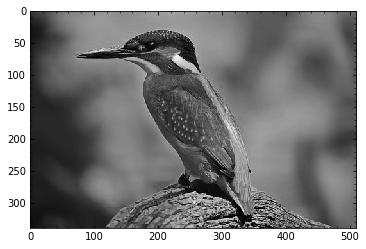

In [23]:
#non symmetric example to show we can do it
bird = io.imread('bird.jpg')
bird_grey = p2p2.make_greyscale(bird)
plt.imshow(bird_grey, cmap = 'gray')

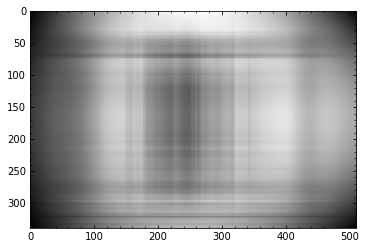

In [27]:
start=np.array([220,150])
window_size=np.array([10,10])
init=p2p2.make_hole(bird_grey,window_size = window_size,start=start)
inpaint(init,start,window_size)

In [28]:
def squarify(M,val):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

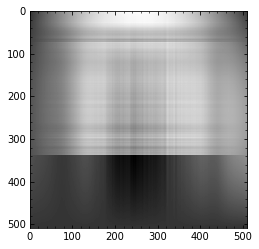

In [29]:
start=np.array([220,200])
window_size=np.array([10,10])
init=p2p2.make_hole(bird_grey,window_size = window_size,start=start)
square=squarify(init,0)
inpaint(square,start,window_size)